<a href="https://colab.research.google.com/github/sharikav/Fakenewsdetection/blob/master/HindiFakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_hindi_fake.csv to Cleaned_hindi_fake.csv
Saving Cleaned_hindi_news.csv to Cleaned_hindi_news.csv


In [ ]:
true_file = "Cleaned_hindi_news.csv"
fake_file = "Cleaned_hindi_fake.csv"

In [ ]:
df_true = pd.read_csv(true_file)
df_fake = pd.read_csv(fake_file)

In [ ]:
df_true.isna().sum() #no nan rows

Unnamed: 0    0
Article       0
dtype: int64

In [ ]:
df_fake.isna().sum() #No nan rows

Unnamed: 0    0
0             0
dtype: int64

In [ ]:
df_true

,Unnamed: 0,Article
0,0,सोनभद्र जिले में सोमवार को 20 और लोगों की जांच...
1,1,Image Source : INSTAGRAM/TANUSRIDASGUPTA बालाज...
2,2,"एंटरटेनमेंट डेस्क, अमर उजाला, Updated Sun, 12 ..."
3,3,वाराणसी में बढ़ते कोरोना संक्रमित मरीजों की संख...
4,4,Image Source : PTI जम्मू-कश्मीर भाजपा अध्यक्ष ...
...,...,...
397,397,This Content has been blocked in your country ...
398,398,"एंटरटेनमेंट डेस्क, अमर उजाला, Updated Mon, 13 ..."
399,399,प्रतीकात्मक तस्वीर\n\nCovid-19 Live updates : ...
400,400,Image Source : FILE Coronavirus cases in Harya...


In [ ]:
df_fake

,Unnamed: 0,0
0,0,कोरोनोवायरस फैलाने के लिए बर्तन चाटते मुसलमान ...
1,1,इस्लामोफोबिक कथाओं के साथ वायरल हो रहे कोरोनोव...
2,2,"कराची में हिंदुओं ने राशन से इनकार किया, पाकिस..."
3,3,मुस्लिम व्यक्ति ने संगरोध से बचने के लिए पुलिस...
4,4,Muslim cop beats Hindu priest in MP कहा जा रहा...
...,...,...
436,436,चीन के विदेश मंत्रालय के प्रवक्ता ने ट्वीट किय...
437,437,"SARS महामारी के दौरान, टेक्सास के वैज्ञानिकों ..."
438,438,वायरस वास्तव में एक जैविक हथियार के रूप में ची...
439,439,विरोध प्रदर्शन एक दौड़ युद्ध शुरू करने के लिए ...


In [ ]:
fake = df_fake["0"]
true = df_true["Article"]

In [ ]:
len(fake),len(true)

(441, 402)

In [ ]:
print("Hindi Article\n--------------------------\n")
print(f"Number of Fake Articles : {len(fake)} ")
print(f"Number of True Article : {len(true)}")

Hindi Article
--------------------------

Number of Fake Articles : 441 
Number of True Article : 402


In [ ]:
df_f = pd.DataFrame({'Article':fake})
df_t = pd.DataFrame({'Article':true})
df_t['category'] = 1
df_f['category'] = 0
df_t.to_csv("NewTrueh.csv",index=False)
df_f.to_csv("NewFakeh.csv",index=False)
df_f.head()

,Article,category
0,कोरोनोवायरस फैलाने के लिए बर्तन चाटते मुसलमान ...,0
1,इस्लामोफोबिक कथाओं के साथ वायरल हो रहे कोरोनोव...,0
2,"कराची में हिंदुओं ने राशन से इनकार किया, पाकिस...",0
3,मुस्लिम व्यक्ति ने संगरोध से बचने के लिए पुलिस...,0
4,Muslim cop beats Hindu priest in MP कहा जा रहा...,0


In [ ]:
new_articles = list(df_t['Article'])
category1 = list(df_t['category'])
category2 = list(df_f['category'])
new_articles.extend(list(df_f['Article']))
df = pd.DataFrame({'Article':new_articles,'Category':category1 + category2})
df

,Article,Category
0,सोनभद्र जिले में सोमवार को 20 और लोगों की जांच...,1
1,Image Source : INSTAGRAM/TANUSRIDASGUPTA बालाज...,1
2,"एंटरटेनमेंट डेस्क, अमर उजाला, Updated Sun, 12 ...",1
3,वाराणसी में बढ़ते कोरोना संक्रमित मरीजों की संख...,1
4,Image Source : PTI जम्मू-कश्मीर भाजपा अध्यक्ष ...,1
...,...,...
838,चीन के विदेश मंत्रालय के प्रवक्ता ने ट्वीट किय...,0
839,"SARS महामारी के दौरान, टेक्सास के वैज्ञानिकों ...",0
840,वायरस वास्तव में एक जैविक हथियार के रूप में ची...,0
841,विरोध प्रदर्शन एक दौड़ युद्ध शुरू करने के लिए ...,0


# Data Cleaning


##Removes the following things for further cleaning of the articles:


*   PUNCTUATIONS
*   EMOJI'S
*   DATES
*   LINKS
*   EMAILS
*   URLS
*   NUMBERS





In [ ]:
  df = df.replace(r'[.\w]{3,}@[.\w]{5,}','', regex=True) #email
  df = df.replace(r'https?://[.\w]{3,}','', regex=True) #urls
  df = df.replace(r'www.[.\w]{3,}','', regex=True) #urls
  df = df.replace(r'[0-9]','', regex=True) #numbers
  df = df.replace(r'\xa0',' ', regex=True) #escape sequences
  df = df.replace(r'\n',' ', regex=True)
  df = df.replace(r'\t','', regex=True)
  df = df.replace(r'\r','', regex=True)
  df = df.replace(r'\s\s\s','', regex=True)
  #df = df.replace(r'\u','',regex=True)

In [ ]:
df.to_csv("cleaned.csv") 

## **DATA PREPROCESSING**

*   Removing punctuation
*   Tokenization
*   Lemmatizing
*   Stopwords
*   Made a new csv file with final data

We used stemming for hindi

In [ ]:
import nltk 
nltk.download('punkt')

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


def remove_punct(my_str):
  no_punct = ""
  for char in my_str:
    if char not in punctuations:
        no_punct = no_punct + char
  return no_punct

def generate_stem_words(word):
		suffixes = {
    1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}
  
		for L in 5, 4, 3, 2, 1:
			if len(word) > L + 1:
				for suf in suffixes[L]:
					#print type(suf),type(word),word,suf
					if word.endswith(suf):
						#print 'h'
						return word[:-L]
		return word
def generate(text):
  new=[]
  for w in text:
    word = generate_stem_words(w)
    new.append(word)
  return " ".join(new)
with open("stopwords.txt") as f:
  all_stopwords = f.read().split("\n")

def remove_stop_words(text_list):
  new = [text for text in text_list if not (text in all_stopwords)]
  return " ".join(new)
hi = remove_stop_words(nltk.word_tokenize(df['Article'][0]))

def preprocess(df):
  df['punctuated'] = df['Article'].apply(remove_punct)
  df['stemmed'] = df['punctuated'].apply(lambda x:generate(nltk.word_tokenize(x)))
  df['stopwords'] = df['stemmed'].apply(lambda x:remove_stop_words(nltk.word_tokenize(x)))
  return df
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

df = preprocess(df)

In [ ]:
df

,Article,Category,punctuated,stemmed,stopwords
0,सोनभद्र जिले में सोमवार को और लोगों की जांच र...,1,सोनभद्र जिले में सोमवार को और लोगों की जांच र...,सोनभद्र जिल में सोमवार को और लोग की जांच रिपोर...,सोनभद्र जिल सोमवार लोग जांच रिपोर्ट कोरो पाजिट...
1,Image Source : INSTAGRAM/TANUSRIDASGUPTA बालाज...,1,Image Source INSTAGRAMTANUSRIDASGUPTA बालाजी ...,Image Source INSTAGRAMTANUSRIDASGUPTA बालाज टे...,Image Source INSTAGRAMTANUSRIDASGUPTA बालाज टे...
2,"एंटरटेनमेंट डेस्क, अमर उजाला, Updated Sun, Ju...",1,एंटरटेनमेंट डेस्क अमर उजाला Updated Sun Jul ...,एंटरटेनमेंट डेस्क अमर उजाल Updated Sun Jul PM ...,एंटरटेनमेंट डेस्क अमर उजाल Updated Sun Jul PM ...
3,वाराणसी में बढ़ते कोरोना संक्रमित मरीजों की संख...,1,वाराणसी में बढ़ते कोरोना संक्रमित मरीजों की संख...,वाराणस में बढ़ कोरो संक्रमित मरीज की संख्य को द...,वाराणस बढ़ कोरो संक्रमित मरीज संख्य देख जिल प्र...
4,Image Source : PTI जम्मू-कश्मीर भाजपा अध्यक्ष ...,1,Image Source PTI जम्मूकश्मीर भाजपा अध्यक्ष रव...,Image Source PTI जम्मूकश्मीर भाजप अध्यक्ष रविं...,Image Source PTI जम्मूकश्मीर भाजप अध्यक्ष रविं...
...,...,...,...,...,...
838,चीन के विदेश मंत्रालय के प्रवक्ता ने ट्वीट किय...,0,चीन के विदेश मंत्रालय के प्रवक्ता ने ट्वीट किय...,चीन के विदेश मंत्रालय के प्रवक् ने ट्वीट किय क...,चीन विदेश मंत्रालय प्रवक् ट्वीट किय संभव अमेरि...
839,"SARS महामारी के दौरान, टेक्सास के वैज्ञानिकों ...",0,SARS महामारी के दौरान टेक्सास के वैज्ञानिकों क...,SARS महामार के दौरान टेक्सास के वैज्ञानिक की ए...,SARS महामार दौरान टेक्सास वैज्ञानिक टीम वायरस ...
840,वायरस वास्तव में एक जैविक हथियार के रूप में ची...,0,वायरस वास्तव में एक जैविक हथियार के रूप में ची...,वायरस वास्तव में एक जैविक हथियार के रूप में ची...,वायरस वास्तव जैविक हथियार रूप ची वैज्ञानिक द्व...
841,विरोध प्रदर्शन एक दौड़ युद्ध शुरू करने के लिए ...,0,विरोध प्रदर्शन एक दौड़ युद्ध शुरू करने के लिए ...,विरोध प्रदर्शन एक दौड़ युद्ध शुर कर के लिए किय...,विरोध प्रदर्शन दौड़ युद्ध शुर किय गय ताक आग लॉ...


In [ ]:
df['punctuated'][5]

'कुपोषण को लेकर UN की रिपोर्ट पर बोले पूर्व खाद्य सचिव सरकार के  किलो अनाज देने से नहीं चलेगा काम पीठ ने कहा कि एक बार इसका निदान हो जाए तो यह सभी अस्पतालों को प्रेषित किया जाना चाहिए अदालत ने इसका समाधान तलाशने के लिए आईसीएमआर को  जुलाई तक का वक्त दिया है और हलफनामे के जरिए अदालत को सूचित करने को कहा है मानव व्यवहार और संबद्ध विज्ञान संस्थान आईएचबीएस ने वकील तुषार सन्नू के जरिए अदालत को सूचित किया था कि उसके यहां भर्ती मानसिक रूप से बीमार लोगों की कोरोना वायरस की जांच करने में दो बाधाएं हैं इसके बाद अदालत का आदेश आया सन्नू ने कहा कि  जून के आईसीएमआर के परामर्श के अनुसार जिस व्यक्ति की कोविड की जांच होनी है उसे सरकार द्वारा जारी पहचान प्रमाण देना होगा और उसके पास वैध फोन नंबर होना चाहिए ताकि उसका और उसके संपर्क में आए लोगों का पता लगाया जा सके उन्होंने कहा कि अधिकतर मानसिक रूप से बीमार व्यक्ति दोनों में से कोई भी शर्त पूरी नहीं करते हैं लिहाजा उनकी कोरोना वायरस की जांच नहीं की जा सकती है आईएचबीएएस ने सुझाव दिया कि आईसीएमआर के दिशानिर्देशों में मानसिक रूप से बीमार बेघर लोगों की परेशानी 

In [ ]:
df['stemmed'][5]

'कुपोषण को ले UN की रिपोर्ट पर बोल पूर्व खाद्य सचिव सरकार के किल अनाज दे से नह चल काम पीठ ने कह कि एक बार इसक निदान हो जाए तो यह सभ अस्पताल को प्रेषित किय जा चाह अदालत ने इसक समाधान तलाश के लिए आईसीएमआर को जुल तक का वक्त दिय है और हलफनाम के जर अदालत को सूचित कर को कह है मानव व्यवहार और संबद्ध विज्ञान संस्थान आईएचबीएस ने वकील तुषार सन्न के जर अदालत को सूचित किय था कि उसक यह भर् मानसिक रूप से बीमार लोग की कोरो वायरस की जांच कर में दो बाध हैं इसक बाद अदालत का आदेश आय सन्न ने कह कि जून के आईसीएमआर के परामर्श के अनुसार जिस व्यक्त की कोविड की जांच हो है उस सरकार द्वार जार पहचान प्रमाण दे होग और उसक पास वैध फोन नंबर हो चाह ताक उसक और उसक संपर्क में आए लोग का पत लग जा सक उन्हों कह कि अधिकतर मानसिक रूप से बीमार व्यक्त दोन में से कोई भी शर्त पूर नह कर हैं लिहाज उनक कोरो वायरस की जांच नह की जा सक है आईएचबीएएस ने सुझाव दिय कि आईसीएमआर के दिशानिर्देश में मानसिक रूप से बीमार बेघर लोग की परेशा के मद्देनजर उचित संशोधन किय जाएं उच्च न्यायालय वकील गौरव कुमार बंसल की याचिक पर सुनव कर रह था उन्हों अप याचि

In [ ]:
df['stopwords'][5]

'कुपोषण ले UN रिपोर्ट बोल पूर्व खाद्य सचिव सरकार किल अनाज दे नह चल काम पीठ कह बार इसक निदान जाए सभ अस्पताल प्रेषित किय चाह अदालत इसक समाधान तलाश आईसीएमआर जुल वक्त दिय हलफनाम जर अदालत सूचित कह मानव व्यवहार संबद्ध विज्ञान संस्थान आईएचबीएस वकील तुषार सन्न जर अदालत सूचित किय उसक भर् मानसिक रूप बीमार लोग कोरो वायरस जांच बाध इसक अदालत आदेश आय सन्न कह जून आईसीएमआर परामर्श अनुसार व्यक्त कोविड जांच सरकार द्वार जार पहचान प्रमाण दे होग उसक पास वैध फोन नंबर चाह ताक उसक उसक संपर्क आए लोग पत लग सक कह अधिकतर मानसिक रूप बीमार व्यक्त दोन शर्त पूर नह लिहाज उनक कोरो वायरस जांच नह सक आईएचबीएएस सुझाव दिय आईसीएमआर दिशानिर्देश मानसिक रूप बीमार बेघर लोग परेशा मद्देनजर उचित संशोधन किय जाएं उच्च न्यायालय वकील गौरव कुमार बंसल याचिक सुनव रह अप याचिक राष्ट्रीय राजधा मानसिक रूप बीमार बेघर लोग कोविड जांच आईसीएमआर दिल्ल सरकार दिशानिर्देश जार निर्देश दे अनुरोध किय दिल्ल सरकार अप हलफनाम कह आईसीएमआर जून परामर्श पालन रह VIDEOप्लाज़्म ले वाल ज़्याद दे वाल कम अब दिल्ल प्लाज़्म बैंक बन नई व्यवस्थ'

In [ ]:
df.to_csv("cleaned_hindi.csv")

## **VECTORISATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
                            
                            analyzer='word',
                            ngram_range=(1, 3),
                            max_features=2000
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )

X = vectorizer.fit_transform(df['stopwords']).toarray() # remember to use the original X_train set


In [ ]:
vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>

In [ ]:
vectorizer.vocabulary_

{'मव': 1422,
 'आई': 405,
 'इनम': 502,
 'रम': 1604,
 'पर': 1177,
 'सर': 1926,
 'आठ': 441,
 'कर': 710,
 'इनक': 501,
 'अल': 377,
 'बर': 1290,
 'सग': 1872,
 'हर': 1983,
 'मल': 1386,
 'रह': 1680,
 'इसक': 515,
 'एमओ': 628,
 'एसक': 640,
 'उप': 568,
 'अब': 337,
 'सबस': 1898,
 'रस': 1678,
 'इत': 494,
 'मर': 1356,
 'गई': 772,
 'वस': 1805,
 'गए': 799,
 'जबक': 933,
 'मध': 1346,
 'यर': 1475,
 'टर': 963,
 'इल': 504,
 'चल': 897,
 'रम रम': 1633,
 'रम पर': 1620,
 'पर सर': 1199,
 'मल रह': 1418,
 'रह इसक': 1689,
 'अब सबस': 349,
 'इसक रम': 524,
 'रम गई': 1616,
 'गए जबक': 805,
 'यर टर': 1477,
 'इल चल': 507,
 'चल रह': 901,
 'इल चल रह': 508,
 'image': 98,
 'source': 198,
 'एट': 618,
 'समय': 1920,
 'यरस': 1482,
 'दस': 1065,
 'तक': 994,
 'मह': 1426,
 'यक': 1450,
 'अम': 361,
 'बच': 1237,
 'चन': 882,
 'अभ': 352,
 'ऐश': 646,
 'वर': 1789,
 'आर': 472,
 'अन': 299,
 'पम': 1174,
 'एक': 596,
 'समथ': 1919,
 'गय': 820,
 'कप': 698,
 'तन': 1008,
 'चप': 891,
 'बत': 1268,
 'पहल': 1220,
 'ऑक': 654,
 'जन': 924,
 'वल': 1800,
 '

In [ ]:
len(vectorizer.get_feature_names())

2000

In [ ]:
X.shape

(843, 2000)

In [ ]:
y = df['Category']

In [ ]:
y.shape

(843,)

TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,df['Category'],test_size=0.33,random_state=0)

In [ ]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.15681927, ..., 0.        , 0.        ,
        0.        ]])

# **RUNNING THE MODELS**

---



---



MULTINOMIAL NAIVE_BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  f1_score,precision_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
y_pred = classifier.predict(X_test)
print("ACCURACY ")
print(accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
results=pd.DataFrame([['MultinomialNB',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])

ACCURACY 
0.9247311827956989
CONFUSION MATRIX
[[140   5]
 [ 16 118]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.924731,0.95935,0.880597,0.918288,0.848757,0.923057,"[[140, 5], [16, 118]]"


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)


Accuracy  on training set: 0.98
Accuracy on test set: 0.92
CONFUSION MATRIX
[[141   4]
 [  4 130]]


SVM-rbf kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['SVM RBF',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)


Accuracy  on training set: 1.00
Accuracy on test set: 0.97
CONFUSION MATRIX
[[143   2]
 [  6 128]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.924731,0.959350,0.880597,0.918288,0.848757,0.923057,"[[140, 5], [16, 118]]"
1,Logistic Regression,0.971326,0.970149,0.970149,0.970149,0.942563,0.971282,"[[141, 4], [4, 130]]"
2,SVM RBF,0.971326,0.984615,0.955224,0.969697,0.942498,0.970715,"[[143, 2], [6, 128]]"


SVM-linear kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['SVM linear',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)

Accuracy  on training set: 0.99
Accuracy on test set: 0.97
CONFUSION MATRIX
[[141   4]
 [  4 130]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.924731,0.959350,0.880597,0.918288,0.848757,0.923057,"[[140, 5], [16, 118]]"
1,Logistic Regression,0.971326,0.970149,0.970149,0.970149,0.942563,0.971282,"[[141, 4], [4, 130]]"
2,SVM RBF,0.971326,0.984615,0.955224,0.969697,0.942498,0.970715,"[[143, 2], [6, 128]]"
3,SVM linear,0.971326,0.970149,0.970149,0.970149,0.942563,0.971282,"[[141, 4], [4, 130]]"


PASSIVE AGGRESIVE CLASSIFIER

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['Passive Aggresive',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)



Accuracy  on training set: 1.00
Accuracy on test set: 0.97
CONFUSION MATRIX
[[141   4]
 [  4 130]]


ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
early_stop = EarlyStopping(monitor='val_loss',patience=1.5)
N, D = X_train.shape
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dropout(0.7),
  #tf.keras.layers.Dense(50,activation='relu'),
  #tf.keras.layers.Dropout(0.7),
  #tf.keras.layers.Dense(50,activation='relu'),
  #tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(Adam(lr=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
his = model.fit(X_train,y_train,epochs=25,verbose=1,shuffle=1,validation_split=0.1,callbacks=[early_stop])

Epoch 1/25
16/16 [==============================] - 0s 13ms/step - loss: 0.6157 - accuracy: 0.6746 - val_loss: 0.3864 - val_accuracy: 1.0000
Epoch 2/25
16/16 [==============================] - 0s 8ms/step - loss: 0.2361 - accuracy: 0.9467 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 3/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0607 - accuracy: 0.9842 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 5/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0288 - val_accuracy: 0.9825


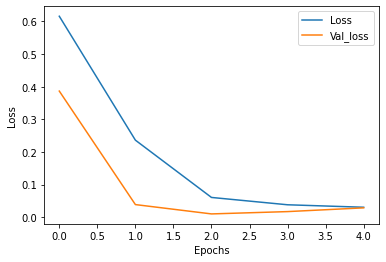

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("Epochs")
plt.legend(["Loss","Val_loss"])
plt.ylabel("Loss")
plt.savefig('loss_plot.png', dpi=300, bbox_inches='tight')
plt.show()

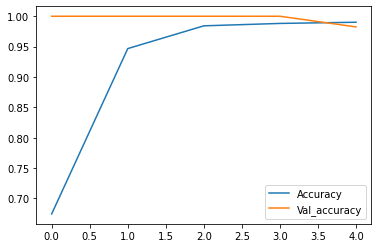

In [ ]:
plt.plot(his.history['accuracy'], label='train')
plt.plot(his.history['val_accuracy'], label='test')

plt.legend(["Accuracy","Val_accuracy"])
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
results.to_csv("finalresults2.csv")

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
 
trainX, trainy, testX, testy = X_train,y_train,X_test,y_test 
yhat_probs = (model.predict(testX) > 0.5).astype("int32")
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

Accuracy: 0.946237
Precision: 0.916084
Recall: 0.977612
F1 score: 0.945848
Cohens kappa: 0.892579
ROC AUC: 0.947427
[[133  12]
 [  3 131]]


In [ ]:
model_results=pd.DataFrame([['ANN2',accuracy,precision,recall,f1,kappa,auc,matrix]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.924731,0.959350,0.880597,0.918288,0.848757,0.923057,"[[140, 5], [16, 118]]"
1,Logistic Regression,0.971326,0.970149,0.970149,0.970149,0.942563,0.971282,"[[141, 4], [4, 130]]"
2,SVM RBF,0.971326,0.984615,0.955224,0.969697,0.942498,0.970715,"[[143, 2], [6, 128]]"
3,SVM linear,0.971326,0.970149,0.970149,0.970149,0.942563,0.971282,"[[141, 4], [4, 130]]"
4,Passive Aggresive,0.971326,0.970149,0.970149,0.970149,0.942563,0.971282,"[[141, 4], [4, 130]]"
5,ANN2,0.946237,0.916084,0.977612,0.945848,0.892579,0.947427,"[[133, 12], [3, 131]]"


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in data:
        
            corpus.append(col.split())

    return corpus

corpus1 = build_corpus(df['stopwords'])
corpus1[0:2]

[['सोनभद्र',
  'जिल',
  'सोमवार',
  'लोग',
  'जांच',
  'रिपोर्ट',
  'कोरो',
  'पाजिटिव',
  'आई',
  'है।',
  'इनम',
  'संक्रमित',
  'गुरम',
  'स्थित',
  'जिल',
  'जेल',
  'परिसर',
  'जुड़',
  'हैं।',
  'इनम',
  'आठ',
  'जेल',
  'कर्म',
  'नौ',
  'बंद',
  'शामिल',
  'हैं।',
  'इनक',
  'अलाव',
  'तीन',
  'लोग',
  'राबर्ट्सगंज',
  'बरवन',
  'लोहर',
  'न्य',
  'मार्केट',
  'रामलील',
  'मैदान',
  'पास',
  'रह',
  'वाल',
  'हैं।',
  'इसक',
  'पुष्ट',
  'सीएमओ',
  'डा',
  'एसक',
  'उपाध्याय',
  'है।',
  'जिल',
  'दिन',
  'अब',
  'सबस',
  'ज्याद',
  'आठ',
  'लोग',
  'संक्त्रस्मित',
  'मिल',
  'थे।',
  'इसक',
  'सोमवार',
  'इत',
  'मरीज',
  'मिले।',
  'इसक',
  'संक्रमित',
  'संख्य',
  'गई।',
  'इनम',
  'लोग',
  'स्वस्थ',
  'लौट',
  'गए',
  'जबक',
  'लोग',
  'मधुपुर',
  'कोविड',
  'केयर',
  'सेंटर',
  'इलाज',
  'चल',
  'रह',
  'है।'],
 ['Image',
  'Source',
  'INSTAGRAMTANUSRIDASGUPTA',
  'बालाज',
  'टेलीफिल्म्स',
  'क्रिएटिव',
  'हेड',
  'कोरो',
  'समय',
  'पूर',
  'देश',
  'कोरो',
  'वायरस',
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2379 mi

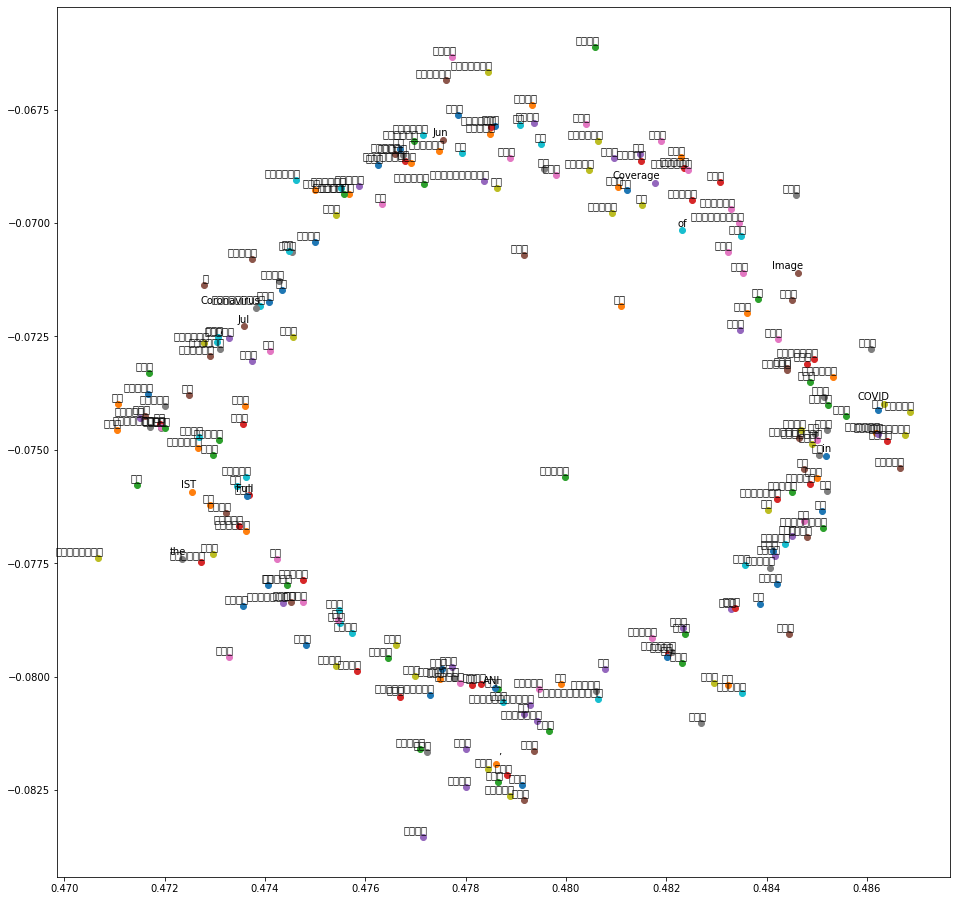

In [ ]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
#model = word2vec.Word2Vec(corpus1, size=100, window=20, min_count=200, workers=4)
model = word2vec.Word2Vec(corpus1, size=100, window=20, min_count=100, workers=4)
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=500, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('bow1.png', dpi=300, bbox_inches='tight')
    plt.show()
tsne_plot(model)

In [ ]:
X_train = df['stopwords']
Y_train = df['Category']

In [ ]:
def preprocess1(x):
  x = remove_punct(x)
  x = generate(nltk.word_tokenize(x))
  x = remove_stop_words(nltk.word_tokenize(x))
  return x

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pipeline = Pipeline([
    
    ('tfidf',TfidfVectorizer(analyzer="word",ngram_range=(1,3),max_features=5000 )),
    ('clf', linear_model.LogisticRegression(C=1e5))
])

In [ ]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=5000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

In [ ]:
!pip install googletrans

In [ ]:
from googletrans import Translator
translator = Translator()
t = translator.translate('The number of people infected with this deadly virus has increased to 85,975 in the state after 3,007 new cases of coronavirus infection were reported in Maharashtra on Sunday. A health official said that after the death of 91 more people due to infection in the state, the death toll in the state has increased to 3,060. The official said that the cases of corona virus infection in Maharashtra have exceeded the cases of China. There are 83,036 confirmed cases of infection in China. 39,314 people have recovered in Maharashtra, 3,060 people have died and 43,591 peopleare undergoing treatment.',dest="hi")
pipeline.predict([t.text])

array([1])

In [ ]:
from googletrans import Translator
translator = Translator()
t = translator.translate(preprocess1('flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion'),dest="hi")
pipeline.predict([preprocess(t.text)])
print(t.text)

उड़ता हिलेरी क्लिंटन बड़ी महिला परिसर breitbart daniel j flynnever को जीवन चक्र गोल चक्कर के रूप में महसूस करना पड़ता है, लेकिन इसका मतलब है कि गंतव्य के लिए सीधी रेखा, हिलेरी क्लिंटन बड़ी महिला परिसर पत्तेदार लिबरल वेस्ली मासैचियन हर जगह रहती है, जहाँ से उद्घाटन की संभावना शेष रहती है जिस तरह से मिस हैविशम हमेशा के लिए शादी की पोशाक पहनकर बड़ी उम्मीदें रखती है। हिलेरी रोथम 48 साल पहले बह निकला था, जिसने पहले से ही स्नातक की उपाधि प्राप्त कर ली थी। राष्ट्रपति कॉलेज ने 1969 के छात्रों को बहस की जरूरत बताई थी कि मुझे लोकतांत्रिक प्राथमिक 2016 की तरह ही प्रवक्ता की तरह पता लगाया जा सकता है कि अज्ञात सात बहनें भी स्कूली हैं, मुझे खुशी है कि एडम्स स्पष्ट हैं मैं आज ही बोल रहा हूं। यू 400 यू मिस रॉडहम ने एडगर बर्गेन चार्ली मकार्थिस मोर्टिमर सिनर्ड्स की उपस्थिति के बाद सहपाठी से कहा कि उपस्थिति के बारे में बताए गए नानी ग्लास को मैट्रनली ज्ञान प्रदान करते हुए कम से कम जॉन लेनन ज्ञान ने पिछले स्पीकर को पहली बार चुनाव सीट देने के बावजूद हमें स्पीकर बना दिया क्योंकि पुनर्निर्माण एडवर्ड ब्रुक की आ

In [ ]:
from googletrans import Translator
translator = Translator()
t = translator.translate('The vaccine for corona has already come',dest="hi")
pipeline.predict([preprocess1(t.text)])

array([0])

In [ ]:
from googletrans import Translator
translator = Translator()
t = translator.translate('eating vegetarian food and eliminating meat from your diet could prevent you getting coronavirus.Indian cricketer Sachin Tendulkar had asked for meat shops to be shut.',dest="hi")
pipeline.predict([preprocess1(t.text)])

array([0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy 

X = numpy.array(list(df['stopwords']))

In [ ]:
X.shape

(843,)

In [ ]:
y = numpy.array(list(df['Category']))

In [ ]:
y.shape

(843,)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test, Ytrain, Ytest = train_test_split(X, y, test_size=0.33)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, SpatialDropout1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
len(tokenizer.word_index)

9482

In [ ]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (564, 1581)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (279, 1581)


In [ ]:
data_test

array([[   0,    0,    0, ..., 2779, 1621,    1],
       [   0,    0,    0, ..., 1145,  603,  410],
       [   0,    0,    0, ...,  189,  224,  225],
       ...,
       [   0,    0,    0, ...,    7,    6,    1],
       [   0,    0,    0, ...,  137,   78,  424],
       [   0,    0,    0, ...,  189,  224,  225]], dtype=int32)

Training model...
Epoch 1/20
18/18 [==============================] - 2s 96ms/step - loss: 0.6820 - accuracy: 0.5585 - val_loss: 0.5726 - val_accuracy: 0.9211
Epoch 2/20
18/18 [==============================] - 1s 72ms/step - loss: 0.6402 - accuracy: 0.7571 - val_loss: 0.6098 - val_accuracy: 0.7599
Epoch 3/20
18/18 [==============================] - 1s 71ms/step - loss: 0.4886 - accuracy: 0.8688 - val_loss: 0.2779 - val_accuracy: 0.9391
Epoch 4/20
18/18 [==============================] - 1s 71ms/step - loss: 0.3649 - accuracy: 0.8688 - val_loss: 0.4863 - val_accuracy: 0.8638
Epoch 5/20
18/18 [==============================] - 1s 71ms/step - loss: 0.2735 - accuracy: 0.9521 - val_loss: 0.1818 - val_accuracy: 0.9785
Epoch 6/20
18/18 [==============================] - 1s 72ms/step - loss: 0.1274 - accuracy: 0.9681 - val_loss: 0.0943 - val_accuracy: 0.9785
Epoch 7/20
18/18 [==============================] - 1s 74ms/step - loss: 0.0591 - accuracy: 0.9840 - val_loss: 0.0818 - val_accuracy: 0.

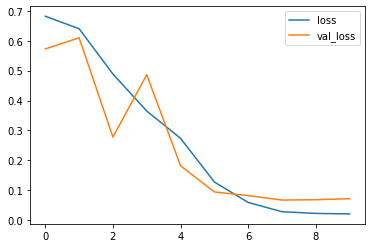

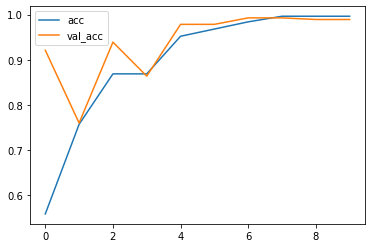

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss',patience=2)
# Create the model

V= len(tokenizer.word_index)
# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 100

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = SpatialDropout1D(0.2)(x)
x = LSTM(M, return_sequences=True)(x)
x = Dense(40,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)


model = Model(i, x)
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=20,
  validation_data=(data_test, Ytest),
  callbacks=[early_stop]
  #validation_split=0.1
)
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('LSTMloss.png', dpi=300, bbox_inches='tight')
plt.show()
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.savefig('LSTMAccu.png', dpi=300, bbox_inches='tight')
plt.show()

Training model...
Epoch 1/10
18/18 [==============================] - 0s 18ms/step - loss: 0.6882 - accuracy: 0.4876 - val_loss: 0.6775 - val_accuracy: 0.8530
Epoch 2/10
18/18 [==============================] - 0s 11ms/step - loss: 0.6542 - accuracy: 0.7748 - val_loss: 0.6048 - val_accuracy: 0.7778
Epoch 3/10
18/18 [==============================] - 0s 12ms/step - loss: 0.4763 - accuracy: 0.8582 - val_loss: 0.2863 - val_accuracy: 0.9355
Epoch 4/10
18/18 [==============================] - 0s 12ms/step - loss: 0.1775 - accuracy: 0.9539 - val_loss: 0.1179 - val_accuracy: 0.9677
Epoch 5/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0486 - accuracy: 0.9876 - val_loss: 0.0638 - val_accuracy: 0.9785
Epoch 6/10
18/18 [==============================] - 0s 11ms/step - loss: 0.0206 - accuracy: 0.9965 - val_loss: 0.0622 - val_accuracy: 0.9785
Epoch 7/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0199 - accuracy: 0.9965 - val_loss: 0.0583 - val_accuracy: 0.

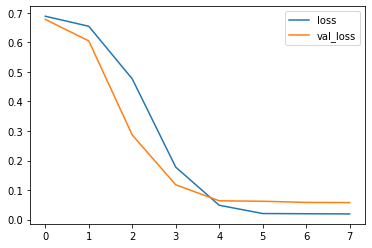

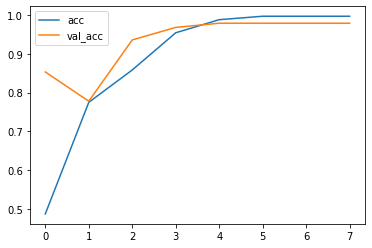

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='accuracy',patience=2)
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest), callbacks=[early_stop]
)
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('CNNloss.png', dpi=300, bbox_inches='tight')
plt.show()
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.savefig('CNNaccu.png', dpi=300, bbox_inches='tight')
plt.show()

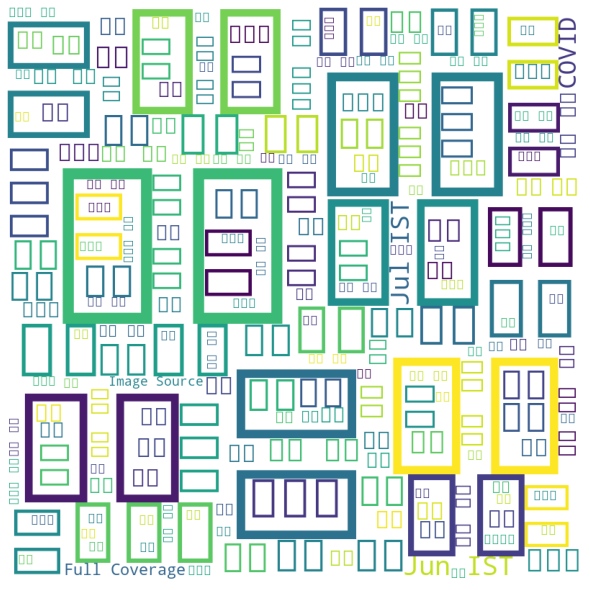

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
cop=' '.join(df['stopwords'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                 
                min_font_size = 10).generate(cop) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 